<a href="https://colab.research.google.com/github/seungmineeeee/python/blob/main/CNN_%EA%B3%BC%EC%A0%9C1%EB%B2%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(60000, 28, 28)

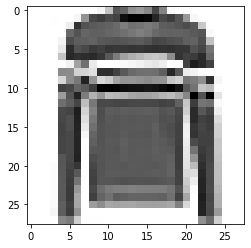

In [ ]:
plt.imshow(x_train[5], cmap='Greys')
plt.show()

In [ ]:
y_test[0:50]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2], dtype=uint8)

In [ ]:
import sys

for x in x_train[5]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  1  0  0  0  0  22 88 1881721321251411991439  0  0  0  1  0  0  0  0  0  
0  0  0  1  0  0  20 13119920619620224225525525022219720618812617 0  0  0  0  0  0  
0  0  0  1  0  35 21419118317817516815016215915215817918318919518582 0  0  0  0  0  
0  0  0  0  0  17019017217717617116916215514815416917417517517718318812 0  0  0  0  
0  0  0  0  25 19418017817418418718918718418118920019719319017817519490 0  0  0  0  
0  0  0  0  42 2181911972082042112092102122112142152132142112111912001580  0  0  0  
0  0  0  0  88 22121521721921118515011810799 88 83 90 1352122032072191690  0  0  0  
0  0  0  0  0  27 11816240 0  0  0  10 19 28 39 47 36 0  0  2032302202030  0  0  0  
0  0  0  0  13813671 69 54 21621720318416816316216317822118638 26 7  0  0  0  0  0  
0  0  0  0  67 13415422412966 81 11712912813213713112986 73 15715113421618 0  0  0  
0  0  0  0  20319817218320625525525024324023923523824425523818416086 98 0  0  0  0  
0  0  0  0  12218822415110512797 10010511411711711310398 11114225

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.

#MODEL_DIR = './data/model/'
#if not os.path.exists(MODEL_DIR):
#    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_CNN.hdf5"


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(x_train, y_train, validation_split=0.25, epochs=20, batch_size=150, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.36472, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.36472 to 0.30241, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.30241 to 0.29586, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.29586 to 0.26196, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.26196 to 0.25404, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.25404 to 0.23405, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.23405

Epoch 8: val_loss improved from 0.23405 to 0.22391, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.22391

Epoch 10: val_loss improved from 0.22391 to 0.22273, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.22273

Epoch 12: val_loss improved from 0.22273 to 0.21952, saving model to ./data/model

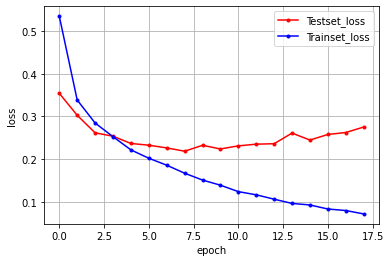

In [ ]:
# 검증셋과 학습셋의 오차를 그래프로 표현
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()